In [ ]:
!pip install gymnasium
!pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

In [1]:
import numpy as np
import bms_env_new
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import random


from utils import *


# Import the necessary libraries
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.env_checker import check_env

In [2]:
num_cells = 5
bms = bms_env_new.BMSenv(num_cells= num_cells, k_tanh_params= np.random.uniform(0, 0.2, num_cells), Q_cells =np.random.uniform(2_000, 4_000 ,num_cells))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


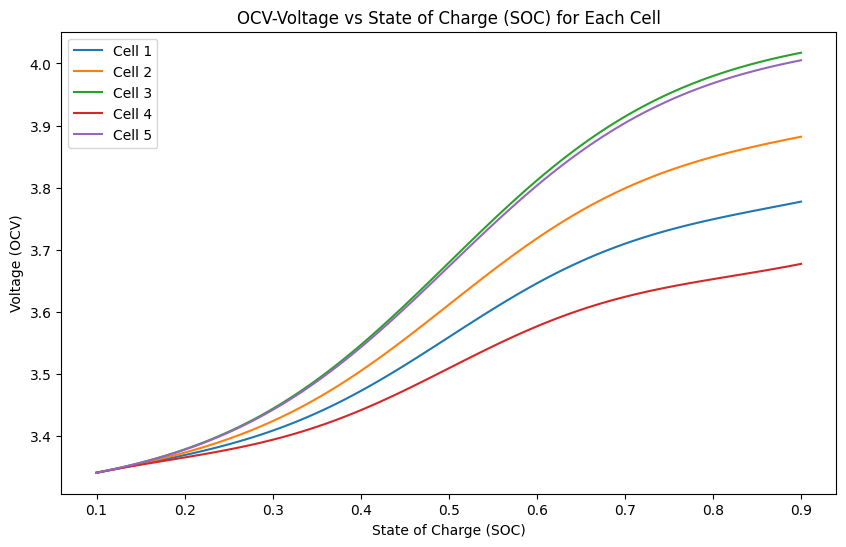

In [3]:
plot_voltage_vs_soc(bms)

In [4]:
T = 20_000

# Always disconected (All the batteries stay still)

In [5]:
bms.reset()
states_1 = [bms.state]
states_voltage_1 = [bms.state_voltage]
actions_1 = []
rewards_1 = []
dones_1 = [False]

while not dones_1[-1] and len(states_1) < T:
    action = [0 for _ in range(num_cells)]
    actions_1.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_1.append(state)
    states_voltage_1.append(bms.state_voltage)
    rewards_1.append(reward)
    dones_1.append(done)

print(f"Sum of rewards: {np.sum(rewards_1)}")

Sum of rewards: -40.218243870650994


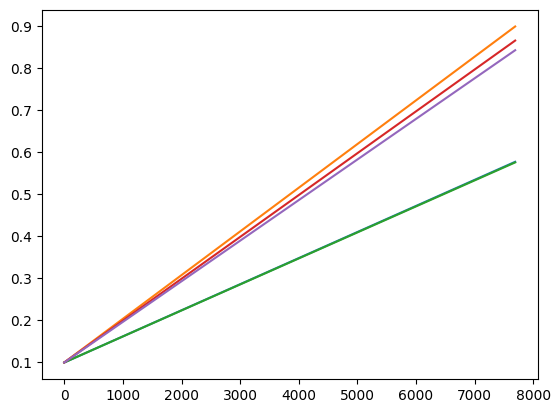

In [6]:
plt.plot(np.arange(len(states_1)), states_1)

KeyboardInterrupt: 

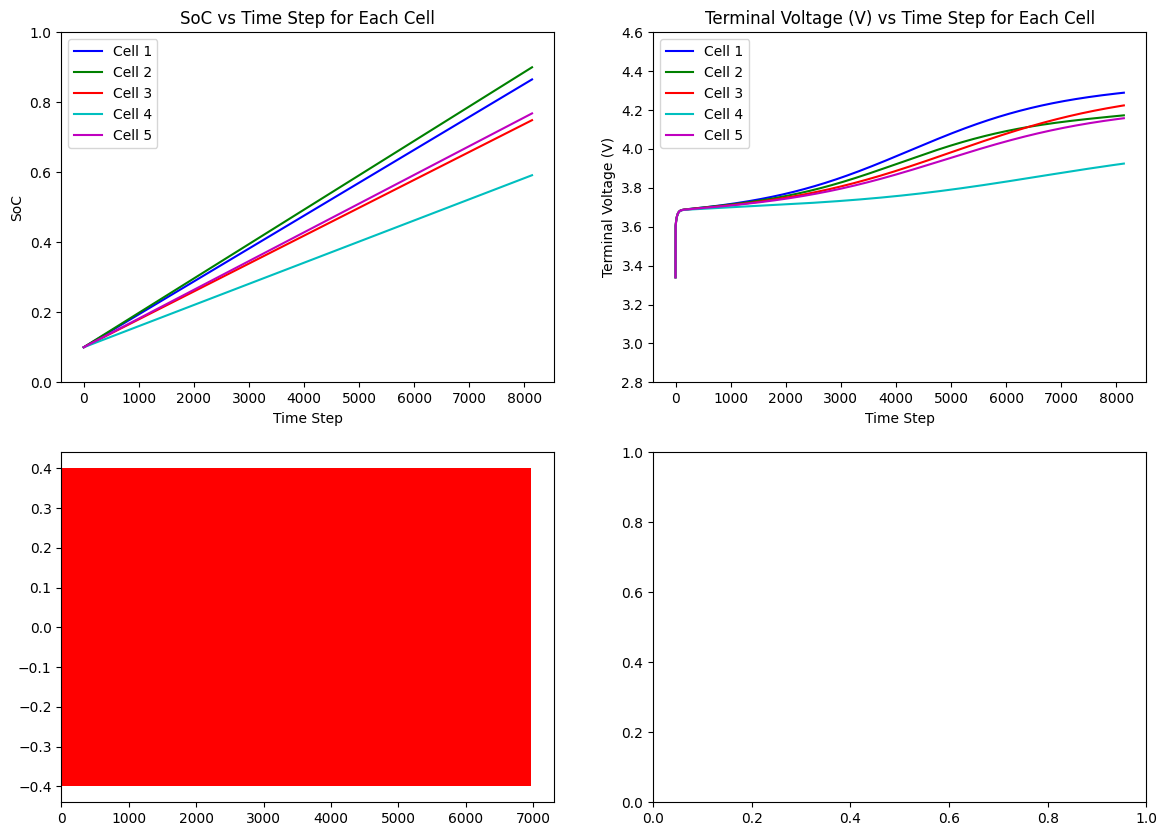

In [7]:
plot_bms_evolution(bms, states_1, states_voltage_1, actions_1, rewards_1, dones_1, include_bad_rewards=True)

# Always connected (All the batteries Discharge)

In [7]:
bms.reset()
states_2 = [bms.state]
states_voltage_2 = [bms.state_voltage]
actions_2 = []
rewards_2 = []
dones_2 = [False]

while not dones_2[-1] and len(states_2) < T:
    action = [1 for _ in range(num_cells)]
    # action = [0, 0, 0, 1, 0]
    actions_2.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_2.append(state)
    states_voltage_2.append(bms.state_voltage)
    rewards_2.append(reward)
    dones_2.append(done)

print(f"Sum of rewards: {np.sum(rewards_2)}")

Sum of rewards: -47.821749749636695


In [8]:
len(states_2)

13050

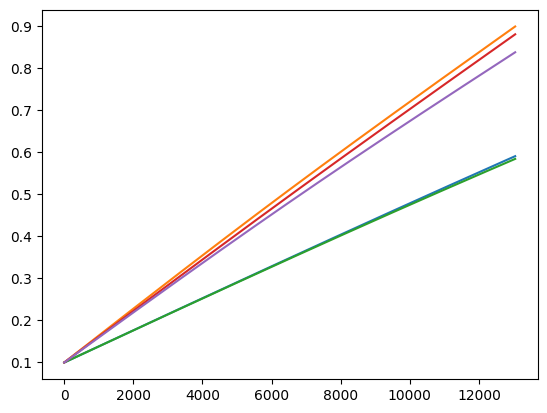

In [9]:
plt.plot(np.arange(len(states_2)), states_2)

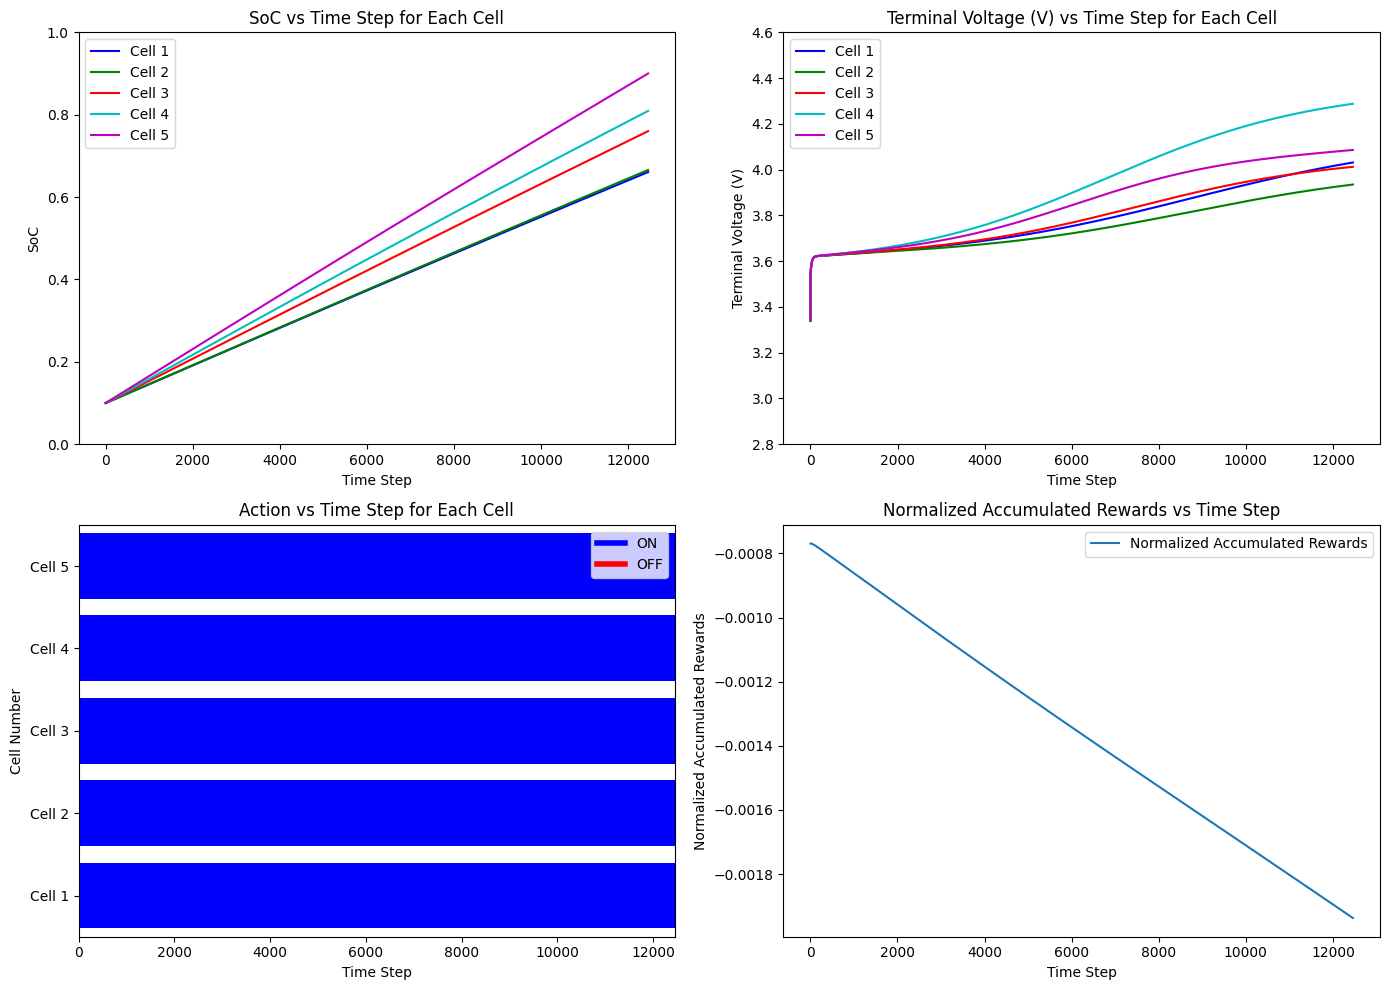

In [10]:
plot_bms_evolution(bms, states_2, states_voltage_2, actions_2, rewards_2, dones_2)

# Random Controller

In [10]:
bms.reset()
states_3 = [bms.state]
states_voltage_3 = [bms.state_voltage]
actions_3 = []
rewards_3 = []
dones_3 = [False]

while not dones_3[-1] and len(states_3) < T:
    action = [np.random.randint(0, 2) for _ in range(num_cells)]
    actions_3.append(action)
    state, reward, done, _, _ = bms.step(action)
    states_3.append(state)
    states_voltage_3.append(bms.state_voltage)
    rewards_3.append(reward)
    dones_3.append(done)

print(f"Sum of rewards: {np.sum(rewards_3)}")

Sum of rewards: -43.55796392281389


In [11]:
len(states_3)

9647

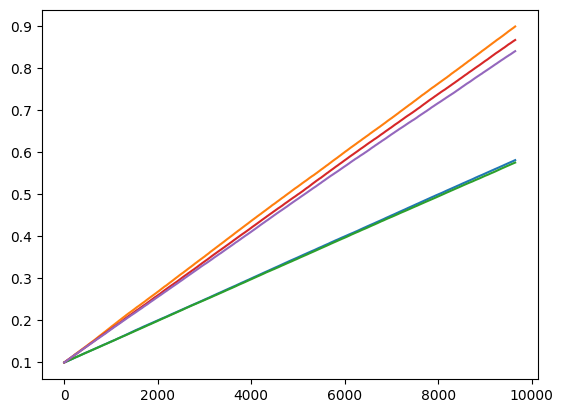

In [12]:
plt.plot(np.arange(len(states_3)), states_3)

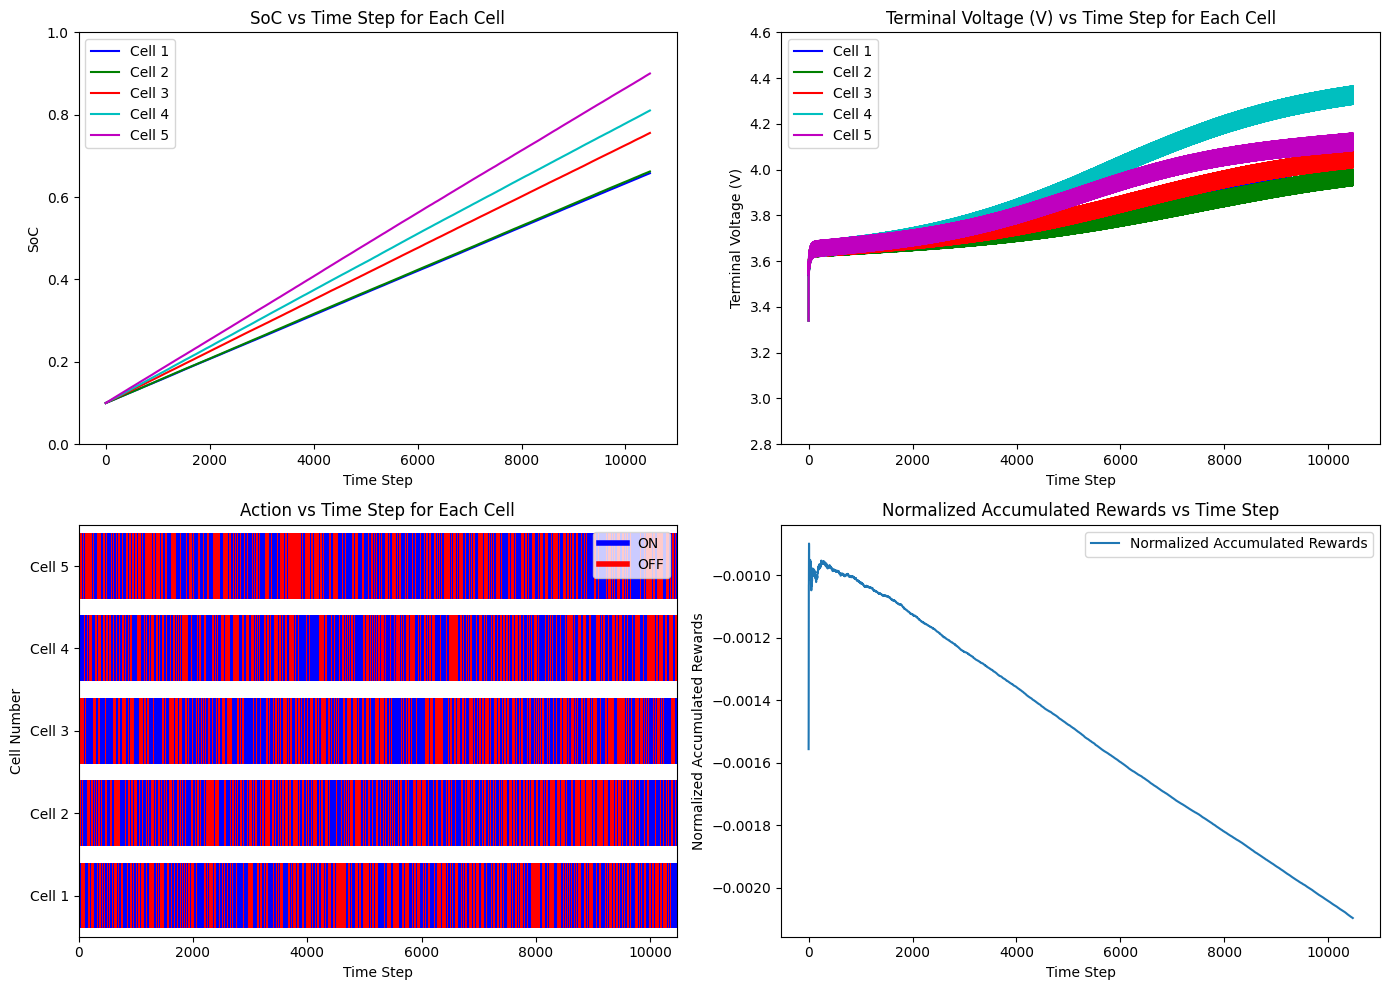

In [13]:
plot_bms_evolution(bms, states_3, states_voltage_3, actions_3, rewards_3, dones_3)

# TABULAR Q-Learning

In [14]:
bins = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])



In [15]:
bins

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [16]:
init_Q_value = -0.1
Q = defaultdict(lambda: init_Q_value)


# Efficient Tabular Q-Learning

In [17]:
num_episodes = 2

memory_threshold = init_Q_value

for episode in range(num_episodes):

    bms.reset()
    states_6 = [bms.state]
    states_voltage_6 = [bms.state_voltage]
    actions_6 = []
    rewards_6 = []
    dones_6 = [False]
    random_actions_6 = []
    actions_int_6 = []
    states_int_6 = [tuple(discretize_features(states_6[-1], bins))]

    epsilon = 0.1
    stepsize = 0.5
    gamma = 0.99

    if episode  >= num_episodes - 1:
        epsilon = 0.0

    while not dones_6[-1] and len(states_6) < T:

        if len(dones_6) % 1000 == 0:
            print('\n')
            print(f"Episode: {episode + 1}")
            print(f"Timesteps: {len(dones_6)}")
            print(f"Memory Threshold:" , memory_threshold)
            print(f"Number of unique (state, action) pairs: {len(Q)}")

        state_int = tuple(discretize_features(states_6[-1], bins))

        if np.random.uniform(0, 1) < epsilon:
            random_actions_6.append(True)
            action = bms.action_space.sample()
        else:
            random_actions_6.append(False)
            # Collect all actions with non-zero Q-values for the current state
            state_actions = [(s, a) for (s, a) in Q.keys() if s == state_int]

            if state_actions:
                max_q_value = max(Q[(state_int, a)] for _, a in state_actions)
                max_actions = [a for _, a in state_actions if Q[(state_int, a)] == max_q_value]
                action_int = random.choice(max_actions)
                action = np.array(action_int)
                if max_q_value < init_Q_value:
                    action = bms.action_space.sample()
                    random_actions_6[-1] = True
            else:
                action = bms.action_space.sample()
                random_actions_6[-1] = True

        action_int = tuple(action)
        actions_int_6.append(action_int)

        state, reward, done, _, _ = bms.step(action)
        state_voltage = bms.state_voltage
        states_6.append(state)
        states_voltage_6.append(state_voltage)
        actions_6.append(action)
        rewards_6.append(reward)
        dones_6.append(done)

        if not done:
            next_state_int = tuple(discretize_features(state, bins))
            states_int_6.append(next_state_int)
            next_state_actions = [(s, a) for (s, a) in Q.keys() if np.all(s == next_state_int)]
            if next_state_actions:
                max_next_q_value = max(Q[(next_state_int, a)] for _, a in next_state_actions)
            else:
                max_next_q_value = init_Q_value

            if (state_int, action_int) not in Q:
                Q[(state_int, action_int)] = init_Q_value

            Q[(state_int, action_int)] = Q[(state_int, action_int)] + stepsize * (
                reward + gamma * max_next_q_value - Q[(state_int, action_int)]
            )

        # Remove entries with Q-values less than 0.0
        Q = {k: v for k, v in Q.items() if v >= memory_threshold}
        if len(Q) > 700:
            memory_threshold/=1.1
        if len(Q) < 500 and (np.abs(memory_threshold) < 100):
            memory_threshold*=1.1



    if episode % 1 == 0:
        print('\n\n')
        print(f"Episode: {episode + 1}")
        print(f"Sum of rewards: {np.sum(rewards_6)}")
        print(f"Timesteps: {len(dones_6)}")
        print(f"Number of states visited: {len(set(states_int_6))}")
        print(f"Number of random actions: {sum(random_actions_6)}")
        print(f"Number of unique (state, action) pairs: {len(Q)}")





Episode: 1
Timesteps: 1000
Memory Threshold: -105.11531995000594
Number of unique (state, action) pairs: 30


Episode: 1
Timesteps: 2000
Memory Threshold: -105.11531995000594
Number of unique (state, action) pairs: 74


Episode: 1
Timesteps: 3000
Memory Threshold: -105.11531995000594
Number of unique (state, action) pairs: 104


Episode: 1
Timesteps: 4000
Memory Threshold: -105.11531995000594
Number of unique (state, action) pairs: 170


Episode: 1
Timesteps: 5000
Memory Threshold: -105.11531995000594
Number of unique (state, action) pairs: 214


Episode: 1
Timesteps: 6000
Memory Threshold: -105.11531995000594
Number of unique (state, action) pairs: 251


Episode: 1
Timesteps: 7000
Memory Threshold: -105.11531995000594
Number of unique (state, action) pairs: 310


Episode: 1
Timesteps: 8000
Memory Threshold: -105.11531995000594
Number of unique (state, action) pairs: 395


Episode: 1
Timesteps: 9000
Memory Threshold: -105.11531995000594
Number of unique (state, action) pairs: 433


E

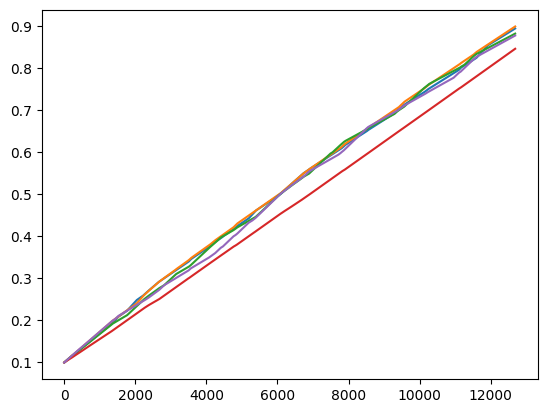

In [18]:
plt.plot(np.arange(len(states_6)), states_6)

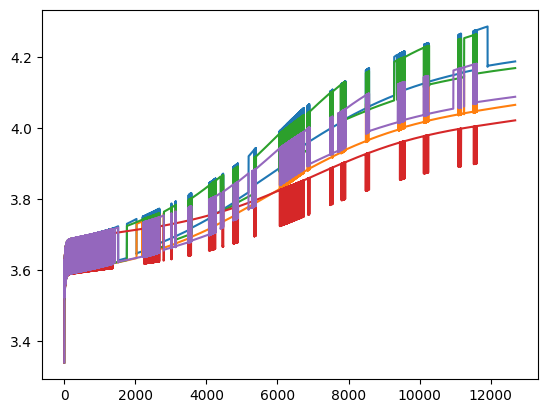

In [21]:
plt.plot(np.arange(len(states_6)), states_voltage_6)

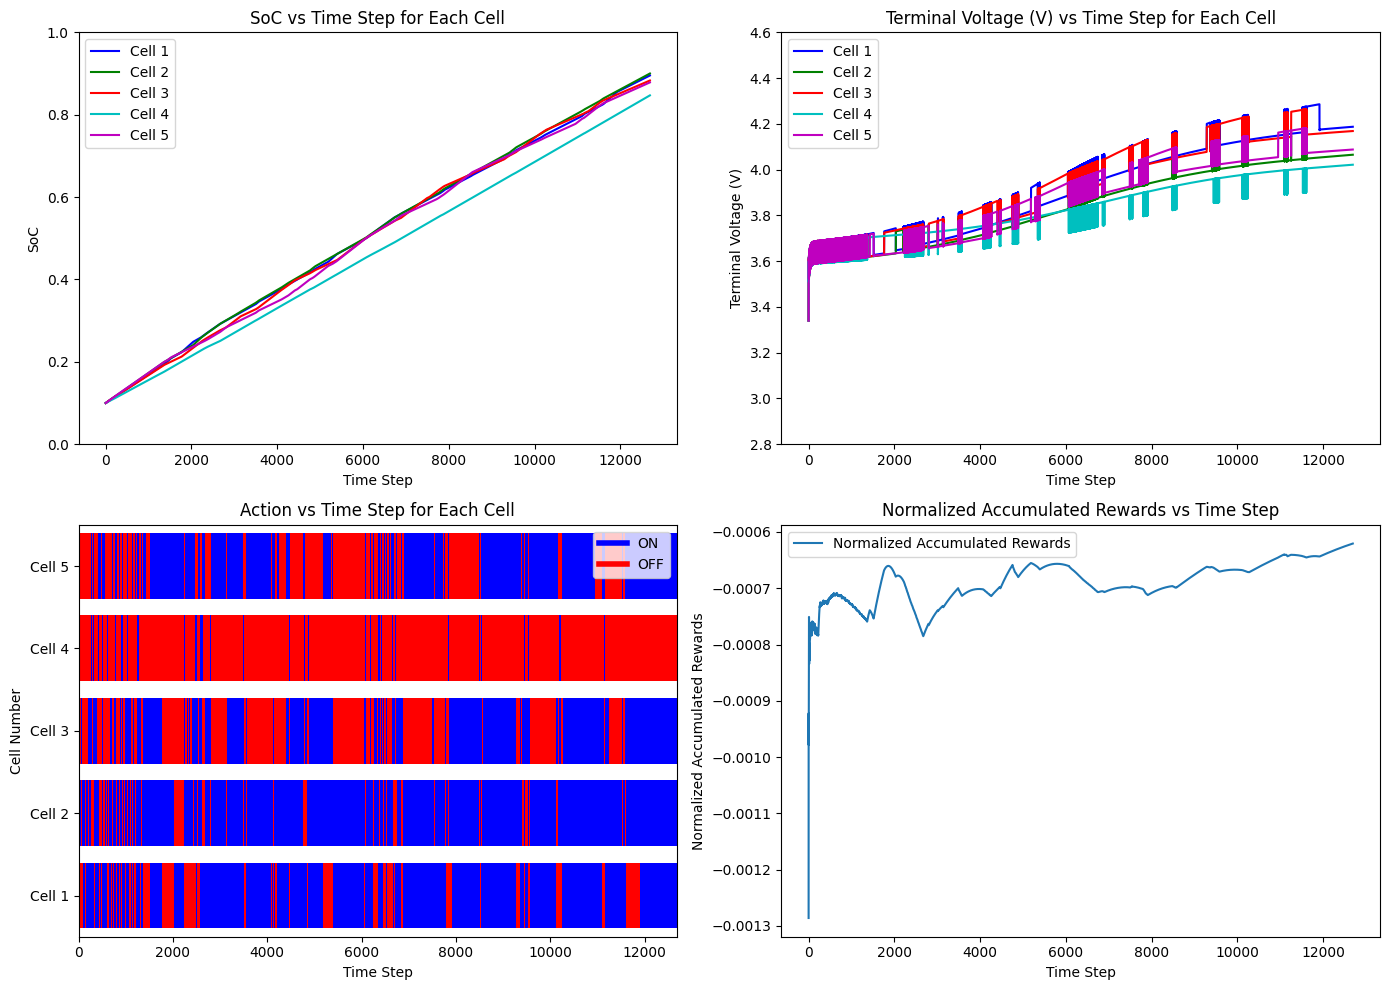

In [20]:
plot_bms_evolution(bms, states_6, states_voltage_6, actions_6, rewards_6, dones_6)

# PPO


In [13]:
bms.reset()
# Check if the environment follows the gym interface
check_env(bms)

In [14]:
model = PPO("MlpPolicy", bms,  verbose=1)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [15]:
model.learn(total_timesteps= 100_000)
model.save("ppo_bms")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-----------------------------
| time/              |      |
|    fps             | 690  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 631        |
|    iterations           | 2          |
|    time_elapsed         | 6          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00706339 |
|    clip_fraction        | 0.0465     |
|    clip_range           | 0.2        |
|    entropy_loss         | -3.46      |
|    explained_variance   | 6.72e-05   |
|    learning_rate        | 0.0003     |
|    loss                 | 0.581      |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.00533   |
|    value_loss           | 1.15       |
----------------------------------------
-----------------------------------------
| time/   

In [35]:
model = PPO.load("ppo_bms")

bms.reset()
states_7 = [bms.state]
states_voltage_7 = [bms.state_voltage]
actions_7 = []
rewards_7 = []
dones_7 = [False]
random_actions_7 = []
actions_int_7 = []
states_int_7 = [tuple(discretize_features(states_7[-1], bins))]

while not dones_7[-1] and len(states_7) <  T:
    action, _ = model.predict(bms.state, deterministic=False)
    actions_7.append(action)
    state_7, reward_7, done_7, _ , _= bms.step(action)
    states_7.append(state_7)
    states_voltage_7.append(bms.state_voltage)
    actions_int_7.append(tuple(action))
    rewards_7.append(reward_7)
    dones_7.append(done_7)

print(f"Sum of rewards: {np.sum(rewards_7)}")

Sum of rewards: -4.795615541633315


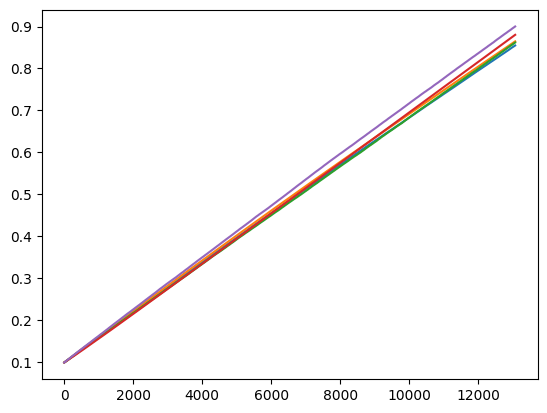

In [36]:
plt.plot(np.arange(len(states_7)), states_7)

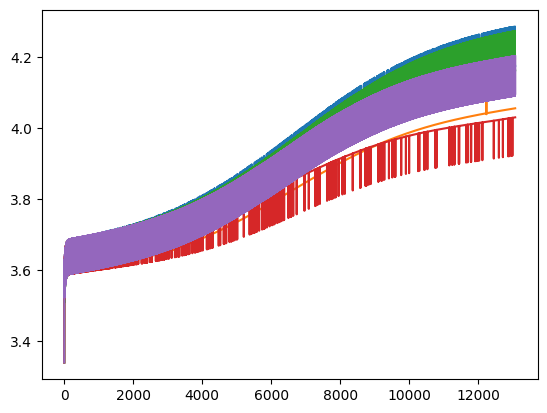

In [37]:
plt.plot(np.arange(len(states_7)), states_voltage_7)